## Importing libraries

In [96]:
import cobra
# from cobra.core import Metabolite, Reaction, Model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import importlib
import matplotlib.lines as mlines
import matplotlib
# import d3flux

In [97]:
from cobra.flux_analysis import flux_variability_analysis
import plotly.io as pio
import plotly.express as px
from escher import Builder

In [98]:
import metabolic_analysis_library as mal
importlib.reload(mal)

<module 'metabolic_analysis_library' from '/home/csiharath/Documents/mitocore_calpainopathy/metabolic_analysis_library.py'>

## Loading sbml model

In [99]:
# Loading one model for each condition

mitocore_mouse25=cobra.io.read_sbml_model("Models/Mitocore_mouse.xml")
mitocore_mouse65=cobra.io.read_sbml_model("Models/Mitocore_mouse.xml")
mitocore_mouse85=cobra.io.read_sbml_model("Models/Mitocore_mouse.xml")
mitocore_mouse100=cobra.io.read_sbml_model("Models/Mitocore_mouse.xml")
mitocore_mouse85_bis=cobra.io.read_sbml_model("Models/Mitocore_mouse.xml")
mitocore_mouse100_calpain=cobra.io.read_sbml_model("Models/Mitocore_mouse.xml")
mitocore_mouse_to_update=cobra.io.read_sbml_model("Models/Mitocore_mouse.xml")

### Choosing the solver

In [100]:
models_to_use = [mitocore_mouse25, mitocore_mouse65, mitocore_mouse85, mitocore_mouse100, mitocore_mouse100_calpain, mitocore_mouse_to_update, mitocore_mouse85_bis]

for model in models_to_use:
    model.solver = 'glpk'

In [101]:
mitocore_mouse25

Name,S1SBMLmodel
Memory address,0x07f4ee055b310
Number of metabolites,441
Number of reactions,554
Number of groups,96
Objective expression,1.0*OF_ATP_MitoCore - 1.0*OF_ATP_MitoCore_reverse_653d9
Compartments,"Cytosol, Mitochondrion, External"


## Variables

In [102]:
dict_results_voie_metabolique=dict()
dict_results_accoa=dict()
dict_results_atp=dict()

## Options

In [103]:
VO2max_25 = True
VO2max_65 = True
VO2max_85 = True
VO2max_100 = True

mouse_WT = True
mouse_calpain = True

treemaps = False

## Mice model WT

In [104]:
if VO2max_25 and mouse_WT:
    output25=mal.define_boundary_and_run_model(model=mitocore_mouse25,O2_upper_bound=3.7,glucose_upper_bound=0.03,
        FA_upper_bound=0.1,hydroxybutyrate_upper_bound=0.048,Acetoacetate_upper_bound=0.114, atp_value=14.6, FVA=True)
    
    solution25 = output25[3]
    solution25_dt = solution25.to_frame()

In [105]:
if VO2max_65 and mouse_WT:
    output65=mal.define_boundary_and_run_model(model=mitocore_mouse65,O2_upper_bound=7.9,glucose_upper_bound=0.13,
        FA_upper_bound=0.27,hydroxybutyrate_upper_bound=0.048,Acetoacetate_upper_bound=0.114, atp_value=36.52, FVA=True)
    
    solution65 = output65[3]
    solution65_dt = solution65.to_frame()

In [106]:
if VO2max_85 and mouse_WT:
    output85=mal.define_boundary_and_run_model(model=mitocore_mouse85,O2_upper_bound=11.1,glucose_upper_bound=0.6,
        FA_upper_bound=0.3,hydroxybutyrate_upper_bound=0.048,Acetoacetate_upper_bound=0.114, atp_value=54.8, FVA=True)
    
    solution85 = output85[3]
    solution85_dt = solution85.to_frame()

In [107]:
if VO2max_100 and mouse_WT:
    output100=mal.define_boundary_and_run_model(model=mitocore_mouse100,O2_upper_bound=14,glucose_upper_bound=2,
        FA_upper_bound=0.08,hydroxybutyrate_upper_bound=0.048,Acetoacetate_upper_bound=0.114, atp_value=75, FVA=True)
    
    solution100 = output100[3]
    solution100_dt = solution100.to_frame()

### Key fluxes

In [108]:
key_reactions = mal.create_df_key_fluxes({'wt_25': solution25, 'wt_65': solution65, 'wt_85': solution85, 'wt_100': solution100}, list_enzyme=["FBA", "PDHm", "LDH_L", "CSm", "CI_MitoCore", "r0722", "r0732", "OF_ATP_MitoCore", "O2t"])
key_reactions

,wt_25,wt_65,wt_85,wt_100
FBA,0.030000,0.130000,0.600000,2.000000
PDHm,0.110500,0.201000,1.304833,3.846167
LDH_L,-0.075000,-0.104000,-0.141167,-0.399833
CSm,1.104578,2.801400,3.768833,4.694167
CI_MitoCore,3.188657,8.542738,14.333087,21.446837
r0722,0.100000,0.270000,0.300000,0.080000
r0732,0.100000,0.270000,0.300000,0.080000
OF_ATP_MitoCore,14.600000,36.520000,54.800000,75.000000
O2t,3.311407,7.900000,11.100000,14.000000


### Building dataframes

#### Dataframes for treemaps

In [109]:
dt25 = mal.build_dataframe(mitocore_mouse25, solution25, 0, 18)
dt65 = mal.build_dataframe(mitocore_mouse65, solution65, 0, 18)
dt85 = mal.build_dataframe(mitocore_mouse85, solution85, 0, 18)
dt100 = mal.build_dataframe(mitocore_mouse100, solution100, 0, 18)

#### Dataframes of all fluxes

In [110]:
all_fluxes_25 = mal.build_dataframe_visual(mitocore_mouse25, solution25)

In [111]:
all_fluxes_65 = mal.build_dataframe_visual(mitocore_mouse65, solution65)
# print(all_fluxes_65.to_markdown())

In [112]:
all_fluxes_85 = mal.build_dataframe_visual(mitocore_mouse85, solution85)
# print(all_fluxes_85.to_markdown())

In [113]:
all_fluxes_100 = mal.build_dataframe_visual(mitocore_mouse100, solution100)
# print(all_fluxes_100.to_markdown())

### Flux Variability Analysis

In [114]:
fva25 = output25[4]
fva65 = output65[4]
fva85 = output85[4]
fva100 = output100[4]

In [115]:
df = mal.build_dataframe_visual(mitocore_mouse100, fva100, True)
# print(df.to_markdown())

### Building treemaps

In [116]:
if mouse_WT and treemaps:
    mal.display_treemap(dt25, '25')
    mal.display_treemap(dt65, '65')
    mal.display_treemap(dt85, '85')
    mal.display_treemap(dt100, '100')

### Relative contributions of pathways during exercise

['glycolysis', 'beta oxidation', 'Ketone bodies', 'Leucine degradation', 'Isoleucine degradation']


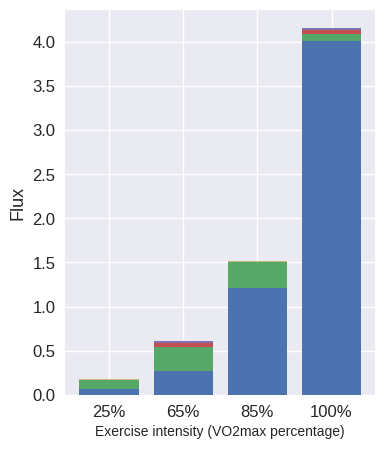

<module 'matplotlib.pyplot' from '/home/csiharath/.conda/envs/mitoenv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [117]:
dict_path = {'glycolysis': 'PGM', "beta oxidation":'r0732', "Ketone bodies":'BDHm', "Leucine degradation":'LEUTAm', 'Isoleucine degradation': "ILETAm"}
df_metabolic_pathways=mal.get_dict_pathways([solution25, solution65, solution85, solution100], dict_path)
mal.barplot_pathways(df_metabolic_pathways, "plot_pathways_control.png", keys=['glycolysis', 'beta oxidation', 'Ketone bodies', 'Leucine degradation', 'Isoleucine degradation'])

In [118]:
df_metabolic_pathways_prop = mal.build_df_proportion(df_metabolic_pathways)

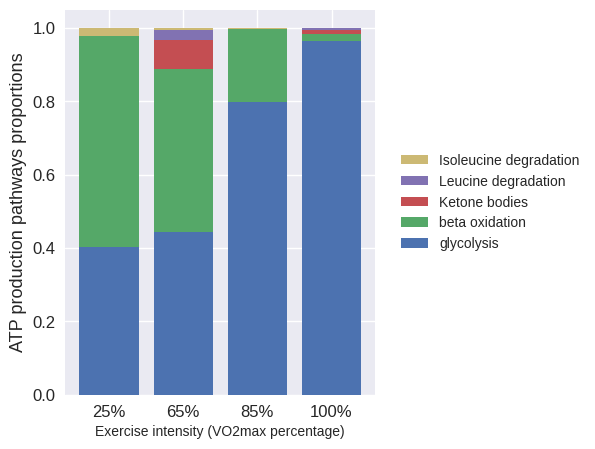

<module 'matplotlib.pyplot' from '/home/csiharath/.conda/envs/mitoenv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [119]:
mal.barplot_pathways(df_metabolic_pathways_prop,"plot_pathways_proportions_control.png", keys=['glycolysis', 'beta oxidation', 'Ketone bodies', 'Leucine degradation', 'Isoleucine degradation'], prop=True, add_legend=True)

In [120]:
df_wt_plot = mal.create_df_flux_plot({'wt_25': [solution25, fva25], 'wt_65': [solution65, fva65], 'wt_85': [solution85, fva85], 'wt_100': [solution100, fva100]}, list_enzyme = ["FBA", "PDHm", "LDH_L", "CSm", "CI_MitoCore", "r0722", "r0732", "O2t"])

In [121]:
# cmap = matplotlib.cm.get_cmap('Set2')
# count = 0

# for enzyme in list(set(df_wt_plot['enzymes'].to_list())):
#     df_enz = df_wt_plot.loc[df_wt_plot['enzymes'] == enzyme]
#     fig, ax = plt.subplots(1, 1, figsize=(5, 1.5), sharey=True)
#     ax.scatter(df_enz['intensity'], df_enz['fluxes'], color=cmap(count))
#     ax.plot(df_enz['intensity'], df_enz['fluxes'], color=cmap(count))
#     ax.fill_between(df_enz['intensity'], df_enz['fva_min'], df_enz['fva_max'], alpha=0.2, color=cmap(count), linewidth=0)
#     leg = mlines.Line2D([], [], color=cmap(count), marker='.', markersize=10, label=enzyme, ls='-')
#     fig.legend(handles=[leg])
#     count += 1

## Mice model Calpainopathy

In [122]:
mitocore_mouse25_calpain=cobra.io.read_sbml_model("Models/Mitocore_mouse_calpain.xml")
mitocore_mouse65_calpain=cobra.io.read_sbml_model("Models/Mitocore_mouse_calpain.xml")
mitocore_mouse85_calpain=cobra.io.read_sbml_model("Models/Mitocore_mouse_calpain.xml")
mitocore_mouse100bis_calpain=cobra.io.read_sbml_model("Models/Mitocore_mouse_calpain.xml")

In [123]:
models_to_use = [mitocore_mouse25_calpain, mitocore_mouse65_calpain, mitocore_mouse85_calpain, mitocore_mouse100bis_calpain]

for model in models_to_use:
    model.solver = 'glpk'
    # for reaction, row in df_bounds_negative.iterrows():
    #     model.reactions.get_by_id(reaction).lower_bound = row['lowerbounds_calpain']

In [124]:
O2_ub_25 = min(mitocore_mouse25_calpain.reactions.O2t.upper_bound, 3.7)
GLC_ub_25 = min(mitocore_mouse25_calpain.reactions.GLCt1r.upper_bound, 0.03)
FA_ub_25 = min(mitocore_mouse25_calpain.reactions.HDCAtr.upper_bound, 0.1)
ATP_ub_25 = min(mitocore_mouse25_calpain.reactions.OF_ATP_MitoCore.upper_bound, 14.6)

O2_ub_65 = min(mitocore_mouse65_calpain.reactions.O2t.upper_bound, 7.9)
GLC_ub_65 = min(mitocore_mouse65_calpain.reactions.GLCt1r.upper_bound, 0.13)
FA_ub_65 = min(mitocore_mouse65_calpain.reactions.HDCAtr.upper_bound, 0.27)
ATP_ub_65 = min(mitocore_mouse65_calpain.reactions.OF_ATP_MitoCore.upper_bound, 36.52)

O2_ub_85 = min(mitocore_mouse85_calpain.reactions.O2t.upper_bound, 11.1)
GLC_ub_85 = min(mitocore_mouse85_calpain.reactions.GLCt1r.upper_bound, 0.6)
FA_ub_85 = min(mitocore_mouse85_calpain.reactions.HDCAtr.upper_bound, 0.3)
ATP_ub_85 = min(mitocore_mouse85_calpain.reactions.OF_ATP_MitoCore.upper_bound, 54.8)

O2_ub_100 = min(mitocore_mouse100bis_calpain.reactions.O2t.upper_bound, 14)
GLC_ub_100 = 2
FA_ub_100 = min(mitocore_mouse100bis_calpain.reactions.HDCAtr.upper_bound, 0.08)
ATP_ub_100 = min(mitocore_mouse100bis_calpain.reactions.OF_ATP_MitoCore.upper_bound, 75)

In [125]:
mitocore_mouse25_calpain.reactions.LDH_L.upper_bound = solution25.to_frame().loc['LDH_L']['fluxes']
mitocore_mouse65_calpain.reactions.LDH_L.upper_bound = solution65.to_frame().loc['LDH_L']['fluxes']
mitocore_mouse85_calpain.reactions.LDH_L.upper_bound = solution85.to_frame().loc['LDH_L']['fluxes']
mitocore_mouse100bis_calpain.reactions.LDH_L.upper_bound = solution100.to_frame().loc['LDH_L']['fluxes'] * 2.83
# mitocore_mouse100bis_calpain.reactions.FBA.lower_bound = solution100.to_frame().loc['FBA']['fluxes'] * 1.33

In [126]:
if VO2max_25 and mouse_calpain:
    output25_calpain=mal.define_boundary_and_run_model(model=mitocore_mouse25_calpain,O2_upper_bound=O2_ub_25,glucose_upper_bound=GLC_ub_25,
        FA_upper_bound=FA_ub_25,hydroxybutyrate_upper_bound=0.048,Acetoacetate_upper_bound=0.114, atp_value=ATP_ub_25, FVA=True)
    
    solution25_calpain = output25_calpain[3]


if VO2max_65 and mouse_calpain:
    # mitocore_mouse.reactions.r0732.bounds = (0.75,1000)
    output65_calpain=mal.define_boundary_and_run_model(model=mitocore_mouse65_calpain,O2_upper_bound=O2_ub_65,glucose_upper_bound=GLC_ub_65,
        FA_upper_bound=FA_ub_65,hydroxybutyrate_upper_bound=0.048,Acetoacetate_upper_bound=0.114, atp_value=ATP_ub_65, FVA=True)
    
    solution65_calpain = output65_calpain[3]


if VO2max_85 and mouse_calpain:
    # mitocore_mouse.reactions.r0732.bounds = (1,1000)
    output85_calpain=mal.define_boundary_and_run_model(model=mitocore_mouse85_calpain,O2_upper_bound=O2_ub_85,glucose_upper_bound=GLC_ub_85,
        FA_upper_bound=FA_ub_85,hydroxybutyrate_upper_bound=0.048,Acetoacetate_upper_bound=0.114, atp_value=ATP_ub_85, FVA=True)
    
    solution85_calpain = output85_calpain[3]


if VO2max_100 and mouse_calpain:
    output100_calpain=mal.define_boundary_and_run_model(model=mitocore_mouse100bis_calpain,O2_upper_bound=O2_ub_100,glucose_upper_bound=GLC_ub_100,
        FA_upper_bound=FA_ub_100,hydroxybutyrate_upper_bound=0.048,Acetoacetate_upper_bound=0.114, atp_value=ATP_ub_100, FVA=True)
    
    solution100_calpain = output100_calpain[3]

Text(0, 0.5, 'ATP production flux')

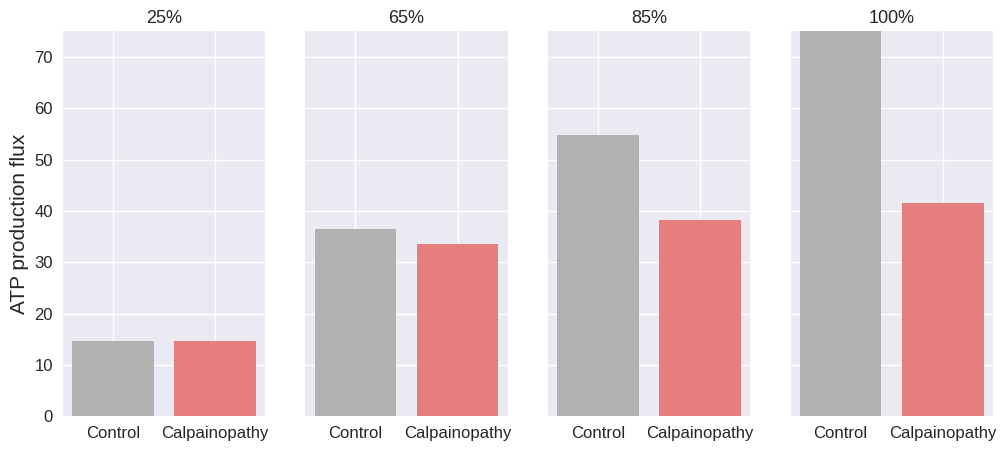

In [127]:
# cmap = matplotlib.cm.get_cmap('tab10')
cmap = ["#b2b2b2", "#e67d7e"]
fig, axes = plt.subplots(1, 4, figsize=(12, 5), sharey=True)
label = ['25%', '65%', '85%', '100%']

# plt.subplots_adjust(right=0.8)

axes[0].bar(["Control", "Calpainopathy"], [14.6, 14.6], color=cmap)
axes[1].bar(["Control", "Calpainopathy"], [36.52, 33.52], color=cmap)
axes[2].bar(["Control", "Calpainopathy"], [54.8, 38.14], color=cmap)
axes[3].bar(["Control", "Calpainopathy"], [75, 41.56], color=cmap)

for i, ax in enumerate(axes):
    ax.set_title(label[i], fontsize=13)
    ax.tick_params(labelsize=12)
    ax.set_ylim(0, 75)
# fig.legend(handles=leg)
# ax.set_xlabel("Modèle", fontsize=13)
# ax.tick_params(labelsize=15)
# ax.set_ylim(0, 75)
axes[0].set_ylabel("ATP production flux", fontsize=15)
# plt.title("100% de VO2max", fontsize=15)

### Key fluxes

In [128]:
key_reactions_calpain = mal.create_df_key_fluxes({'calpain_25': solution25_calpain, 'calpain_65': solution65_calpain, 'calpain_85': solution85_calpain, 'calpain_100': solution100_calpain}, list_enzyme=["FBA", "PDHm", "LDH_L", "CSm", "CI_MitoCore", "r0722", "r0732", "OF_ATP_MitoCore", "O2t"])
key_reactions_calpain

,calpain_25,calpain_65,calpain_85,calpain_100
FBA,0.030000,0.130000,0.600000,2.000000
PDHm,0.033000,0.428000,1.347333,2.535742
LDH_L,-0.075000,-0.104000,-0.141167,-1.538258
CSm,1.101338,2.305781,2.651143,2.588742
CI_MitoCore,3.168676,9.582430,11.792249,12.953757
r0722,0.100000,0.188810,0.120564,0.000000
r0732,0.100000,0.188810,0.120564,0.000000
OF_ATP_MitoCore,14.600000,33.607131,40.884614,46.147306
O2t,3.256176,6.755732,7.782065,7.812226


In [129]:
dict_results_calpain_voie_metabolique=dict()
dict_results_calpain_accoa=dict()

### Building dataframes

#### Dataframes for treemaps

In [130]:
dt25_calpain = mal.build_dataframe(mitocore_mouse25_calpain, solution25_calpain, 0, 18)
dt65_calpain = mal.build_dataframe(mitocore_mouse65_calpain, solution65_calpain, 0, 18)
dt85_calpain = mal.build_dataframe(mitocore_mouse85_calpain, solution85_calpain, 0, 18)

#### Dataframes of all fluxes

In [131]:
all_fluxes_100_calpain = mal.build_dataframe_visual(mitocore_mouse100_calpain, solution100_calpain)
# print(all_fluxes_100_calpain.to_markdown())

In [132]:
all_fluxes_25_calpain = mal.build_dataframe_visual(mitocore_mouse25_calpain, solution25_calpain)
# print(all_fluxes_25_calpain.to_markdown())

In [133]:
all_fluxes_65_calpain = mal.build_dataframe_visual(mitocore_mouse65_calpain, solution65_calpain)

In [134]:
all_fluxes_85_calpain = mal.build_dataframe_visual(mitocore_mouse85_calpain, solution85_calpain)
# print(all_fluxes_85_calpain.to_markdown())

### Flux Variability Analysis

In [135]:
fva25_calpain = output25_calpain[4]
fva65_calpain = output65_calpain[4]
fva85_calpain = output85_calpain[4]
fva100_calpain = output100_calpain[4]

### Building treemaps

In [136]:
if treemaps:
    mal.display_treemap(dt25_calpain, 'calpain 25')
    mal.display_treemap(dt65_calpain, 'calpain 65')
    mal.display_treemap(dt85_calpain, 'calpain 85')

### Relative contributions of pathways during exercise

['glycolysis', 'beta oxidation', 'Ketone bodies', 'Leucine degradation', 'Isoleucine degradation']


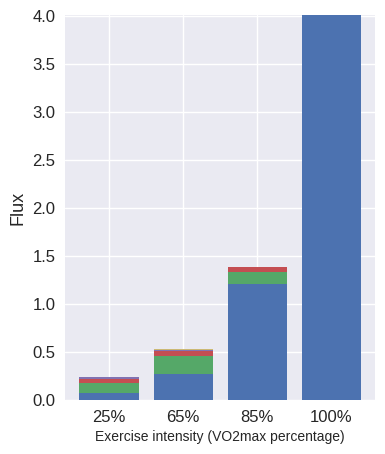

<module 'matplotlib.pyplot' from '/home/csiharath/.conda/envs/mitoenv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [137]:
dict_path = {'glycolysis': 'PGM', "beta oxidation":'r0732', "Ketone bodies":'BDHm', "Leucine degradation":'LEUTAm', 'Isoleucine degradation': "ILETAm"}
df_metabolic_pathways_calpain=mal.get_dict_pathways([solution25_calpain, solution65_calpain, solution85_calpain, solution100_calpain], dict_path)
mal.barplot_pathways(df_metabolic_pathways_calpain, "plot_pathways_calpain.png", keys=['glycolysis', 'beta oxidation', 'Ketone bodies', 'Leucine degradation', 'Isoleucine degradation'])

In [138]:
df_metabolic_pathways_calpain_prop = mal.build_df_proportion(df_metabolic_pathways_calpain)

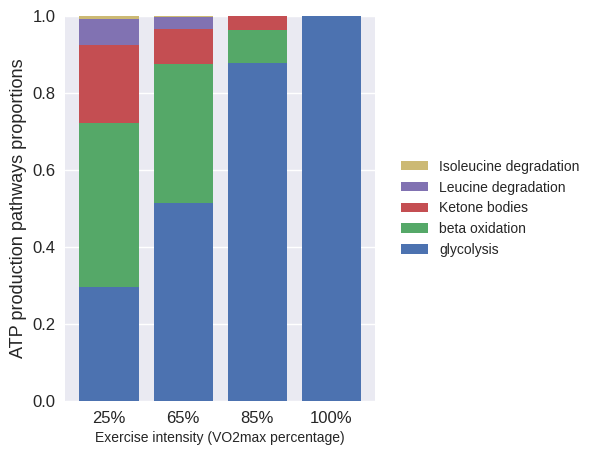

<module 'matplotlib.pyplot' from '/home/csiharath/.conda/envs/mitoenv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [139]:
mal.barplot_pathways(df_metabolic_pathways_calpain_prop, "plot_pathways_proportions_calpain.png", keys=['glycolysis', 'beta oxidation', 'Ketone bodies', 'Leucine degradation', 'Isoleucine degradation'], prop=True, add_legend=True )

In [140]:
df_calpain_plot = mal.create_df_flux_plot({'calpain_25': [solution25_calpain, fva25_calpain], 'calpain_65': [solution65_calpain, fva65_calpain], 'calpain_85': [solution85_calpain, fva85_calpain], 'calpain_100': [solution100_calpain, fva100_calpain]}, list_enzyme = ["FBA", "PDHm", "LDH_L", "CSm", "CI_MitoCore", "r0722", "r0732", "O2t"])

In [141]:
# df_calpain_plot.to_csv('df_calpain_plot.csv')
# df_wt_plot.to_csv('df_wt_plot.csv')

In [142]:
df_calpain_plot['fluxes'] = df_calpain_plot['fluxes'].abs()
df_calpain_plot['fva_min'] = df_calpain_plot['fva_min'].abs()
df_calpain_plot['fva_max'] = df_calpain_plot['fva_max'].abs()
df_wt_plot['fluxes'] = df_wt_plot['fluxes'].abs()
df_wt_plot['fva_min'] = df_wt_plot['fva_min'].abs()
df_wt_plot['fva_max'] = df_wt_plot['fva_max'].abs()

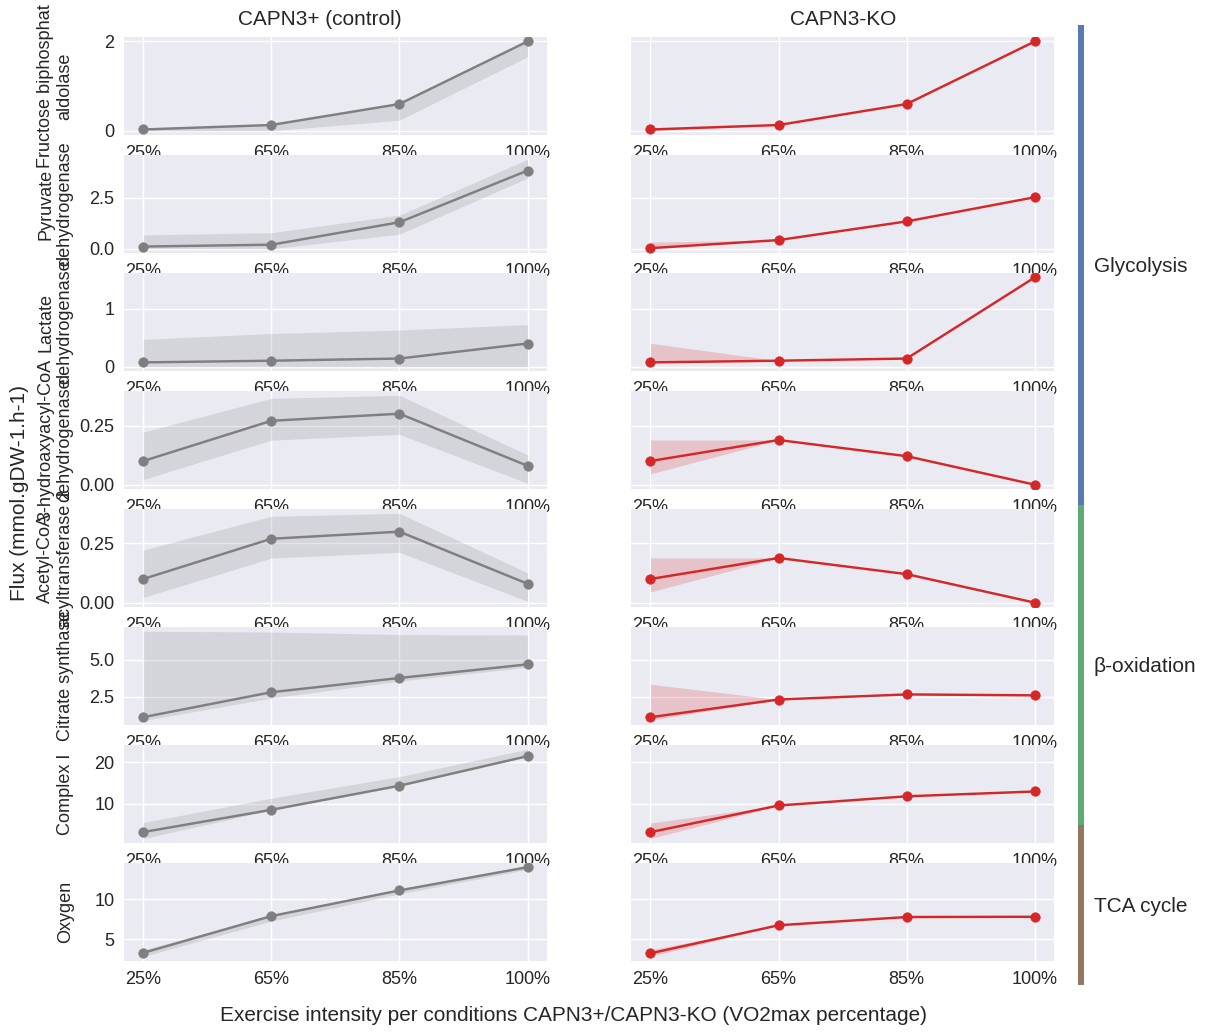

In [143]:
enzyme_name = {"FBA": "Fructose biphosphat\naldolase", "PDHm": "Pyruvate\ndehydrogenase", "LDH_L": "Lactate\ndehydrogenase", "r0722": "3-hydroaxyacyl-CoA\ndehydrogenase", "r0732": "Acetyl-CoA\nacyltransferase 2", "CSm": "Citrate synthase", "CI_MitoCore": "Complex I", "O2t": "Oxygen"}

mal.fva_plot(df_calpain_plot, df_wt_plot, enzyme_name)

# Comparaison

In [144]:
dict_comparaison_voies_25=dict()
dict_comparaison_voies_65=dict()
dict_comparaison_voies_85=dict()
dict_comparaison_voies_100=dict()

In [145]:
pathways = ["Objective Function - ATP", "FA metabolism", 'Glycolysis', "Glycolysis/gluconeogenesis", "TCA cycle", "Boundary conditions - core", "Isoleucine degradation", "Leucine degradation"]
pathways2 = ["FA metabolism", 'Glycolysis', "Glycolysis/gluconeogenesis", "TCA cycle", "Boundary conditions - core", "Isoleucine degradation", "Leucine degradation"]

In [146]:
dt25 = mal.build_dataframe(mitocore_mouse25, solution25, 0, 180, hide_transport=False, from_list=True, pathways_list=pathways2)
dt65 = mal.build_dataframe(mitocore_mouse65, solution65, 0, 180, hide_transport=False, from_list=True, pathways_list=pathways2)
dt85 = mal.build_dataframe(mitocore_mouse85, solution85, 0, 180, hide_transport=False, from_list=True, pathways_list=pathways2)
dt100 = mal.build_dataframe(mitocore_mouse100, solution100, 0, 180, hide_transport=False, from_list=True, pathways_list=pathways2)
dt25_calpain = mal.build_dataframe(mitocore_mouse25_calpain, solution25_calpain, 0, 180, hide_transport=False, from_list=True, pathways_list=pathways2)
dt65_calpain = mal.build_dataframe(mitocore_mouse65_calpain, solution65_calpain, 0, 180, hide_transport=False, from_list=True, pathways_list=pathways2)
dt85_calpain = mal.build_dataframe(mitocore_mouse85_calpain, solution85_calpain, 0, 180, hide_transport=False, from_list=True, pathways_list=pathways2)
dt100_calpain = mal.build_dataframe(mitocore_mouse100_calpain, solution100_calpain, 0, 180, hide_transport=False, from_list=True, pathways_list=pathways2)

## 25% d'intensité

In [147]:
df_pathways_comparison_25 = pd.DataFrame(columns=['CAPN3+', 'CAPN3-KO'])
df_pathways_comparison_25['CAPN3+'] = df_metabolic_pathways['25%']
df_pathways_comparison_25['CAPN3-KO'] = df_metabolic_pathways_calpain['25%']

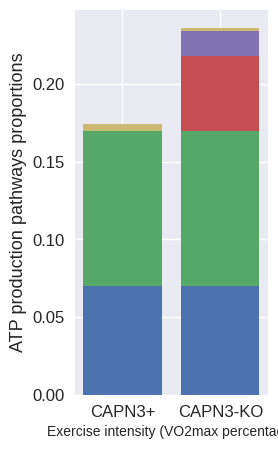

<module 'matplotlib.pyplot' from '/home/csiharath/.conda/envs/mitoenv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [148]:
mal.barplot_pathways(df_pathways_comparison_25, "plot_comparaison_wt_vs_calpain_25.png", keys=['glycolysis', 'beta oxidation', 'Ketone bodies', 'Leucine degradation', 'Isoleucine degradation'], prop=True, figsize=(2.5,5))

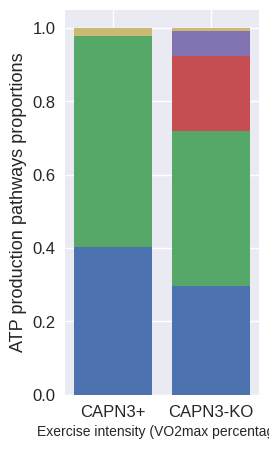

<module 'matplotlib.pyplot' from '/home/csiharath/.conda/envs/mitoenv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [149]:
proportion_wt_calpain_25 = mal.build_df_proportion(df_pathways_comparison_25)
mal.barplot_pathways(proportion_wt_calpain_25, "plot_proportion_wt_calpain_25.png", keys=['glycolysis', 'beta oxidation', 'Ketone bodies', 'Leucine degradation', 'Isoleucine degradation'], prop=True, figsize=(2.5,5))

In [150]:
mal.display_treemap(dt25, 'wt 25')
mal.display_treemap(dt25_calpain, 'calpain 25')

## 65% d'intensité

In [151]:
df_pathways_comparison_65 = pd.DataFrame(columns=['CAPN3+', 'CAPN3-KO'])
df_pathways_comparison_65['CAPN3+'] = df_metabolic_pathways['65%']
df_pathways_comparison_65['CAPN3-KO'] = df_metabolic_pathways_calpain['65%']

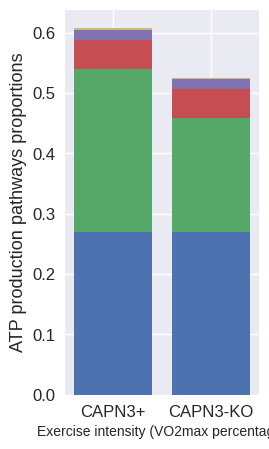

<module 'matplotlib.pyplot' from '/home/csiharath/.conda/envs/mitoenv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [152]:
mal.barplot_pathways(df_pathways_comparison_65, "plot_comparaison_wt_vs_calpain_65.png", keys=['glycolysis', 'beta oxidation', 'Ketone bodies', 'Leucine degradation', 'Isoleucine degradation'], prop=True, figsize=(2.5,5))

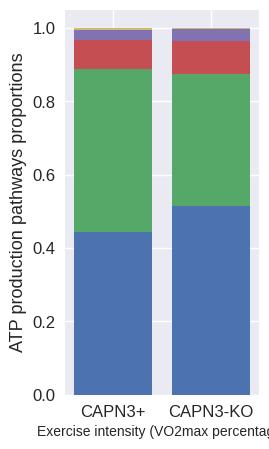

<module 'matplotlib.pyplot' from '/home/csiharath/.conda/envs/mitoenv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [153]:
proportion_wt_calpain_65 = mal.build_df_proportion(df_pathways_comparison_65)
mal.barplot_pathways(proportion_wt_calpain_65, "plot_proportion_wt_calpain_65.png", keys=['glycolysis', 'beta oxidation', 'Ketone bodies', 'Leucine degradation', 'Isoleucine degradation'], prop=True, figsize=(2.5,5))

In [154]:
0.444078947368421+0.444078947368421+0.07894736842105263+0.026315789473684206+0.006578947368421051

0.9999999999999999

In [155]:
mal.display_treemap(dt65, 'wt 65')
mal.display_treemap(dt65_calpain, 'calpain 65')

## 85% d'intensité

In [156]:
df_pathways_comparison_85 = pd.DataFrame(columns=['CAPN3+', 'CAPN3-KO'])
df_pathways_comparison_85['CAPN3+'] = df_metabolic_pathways['85%']
df_pathways_comparison_85['CAPN3-KO'] = df_metabolic_pathways_calpain['85%']

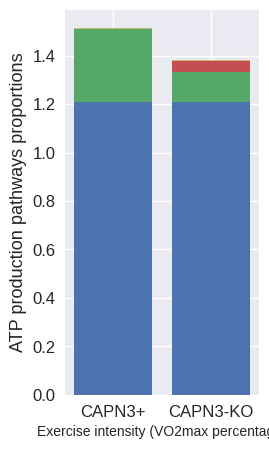

<module 'matplotlib.pyplot' from '/home/csiharath/.conda/envs/mitoenv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [157]:
mal.barplot_pathways(df_pathways_comparison_85, "plot_comparaison_wt_vs_calpain_85.png", keys=['glycolysis', 'beta oxidation', 'Ketone bodies', 'Leucine degradation', 'Isoleucine degradation'], prop=True, figsize=(2.5,5))

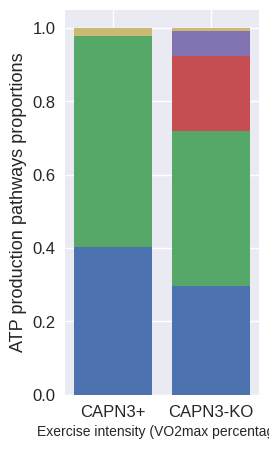

<module 'matplotlib.pyplot' from '/home/csiharath/.conda/envs/mitoenv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [158]:
proportion_wt_calpain_25 = mal.build_df_proportion(df_pathways_comparison_25)
mal.barplot_pathways(proportion_wt_calpain_25, "plot_proportion_wt_calpain_85.png", keys=['glycolysis', 'beta oxidation', 'Ketone bodies', 'Leucine degradation', 'Isoleucine degradation'], prop=True, figsize=(2.5,5))

In [159]:
mal.display_treemap(dt85, 'wt 85')
mal.display_treemap(dt85_calpain, 'calpain 85')

## 100% d'intensité

In [160]:
df_pathways_comparison_100 = pd.DataFrame(columns=['CAPN3+', 'CAPN3-KO'])
df_pathways_comparison_100['CAPN3+'] = df_metabolic_pathways['100%']
df_pathways_comparison_100['CAPN3-KO'] = df_metabolic_pathways_calpain['100%']

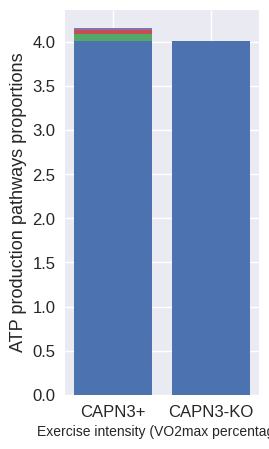

<module 'matplotlib.pyplot' from '/home/csiharath/.conda/envs/mitoenv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [161]:
mal.barplot_pathways(df_pathways_comparison_100, "plot_comparaison_wt_vs_calpain_100.png", keys=['glycolysis', 'beta oxidation', 'Ketone bodies', 'Leucine degradation', 'Isoleucine degradation'], prop=True, figsize=(2.5,5))

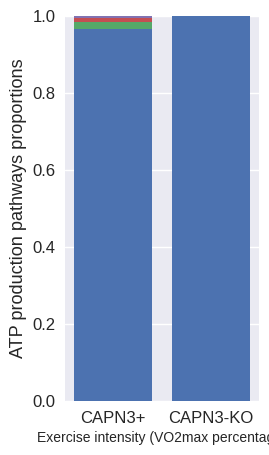

<module 'matplotlib.pyplot' from '/home/csiharath/.conda/envs/mitoenv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [162]:
proportion_wt_calpain_100 = mal.build_df_proportion(df_pathways_comparison_100)
mal.barplot_pathways(proportion_wt_calpain_100, "plot_proportion_wt_calpain_100.png", keys=['glycolysis', 'beta oxidation', 'Ketone bodies', 'Leucine degradation', 'Isoleucine degradation'], prop=True, figsize=(2.5,5))